In [404]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [406]:
#load the data
adult_data=pd.read_csv("Downloads/EDA2/EDA2/adult_with_headers.csv")
#Exploratory Datasets
print("Total missing Values in the train dataset:",adult_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in train datasets:",end=" ")
print(adult_data.duplicated().sum()) 
adult_data=adult_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(adult_data.duplicated().sum())
print(adult_data.info())

Total missing Values in the train dataset: 0
No.of duplicate in train datasets: 24
No.of duplicate in datasets after drop: 0
<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), objec

In [408]:
#select train and test variables
x_train=adult_data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]]

In [410]:
#Build and model Isolation Forest
clf=IsolationForest(random_state=23,contamination=0.01)
clf.fit(x_train)
y_pred=clf.predict(adult_data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]])


In [412]:
pd.value_counts(y_pred_train)


 1    32211
-1      326
Name: count, dtype: int64

In [414]:
y=adult_data[["workclass",
"education",
"marital_status",
"occupation",
"relationship",
"race",
"sex",
"native_country",
"income"]]
print(y)


               workclass    education       marital_status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native_country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-clea

In [416]:
#outlier
print("The outlier lists are:")
print(x_train.loc[y_pred_train==-1,:])


The outlier lists are:
       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
157     71  494223             10             0          1816               2
222     90   51744              9             0          2206              40
387     44  162028             10             0          2415               6
405     41  445382             14             0          1977              65
704     46  295566             16         25236             0              65
...    ...     ...            ...           ...           ...             ...
32035   40  566537              1             0          1672              40
32090   66  115498             13         99999             0              55
32238   47  294913             15         99999             0              40
32341   74  199136             13         15831             0               8
32518   57  110417              9         99999             0              40

[326 rows x 6 columns]


In [418]:
#remove outliers
print("No outliers")
print(x_train.loc[y_pred_train==1,:])
adult_data=x_train.loc[y_pred_train==1,:]
adult_data=pd.concat([adult_data,y],axis=1)
print(adult_data.columns)

No outliers
       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32211 rows x 6 columns]
Index(['age', 'fnlwgt', 'e

In [420]:
#Feature Scaling
#Standardised Scaler-Scale down the feature into mean=0 and standard deviation=1
standscaler=StandardScaler()
for i in adult_data.select_dtypes(include="number").columns: 
    adult_data[i]=standscaler.fit_transform(adult_data[[i]])
print(adult_data.head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.041072 -1.065468       1.155466      0.613509     -0.209476   
1  0.853082 -1.010362       1.155466     -0.223330     -0.209476   
2 -0.032747  0.248045      -0.416254     -0.223330     -0.209476   
3  1.074539  0.429434      -1.202114     -0.223330     -0.209476   
4 -0.770937  1.415430       1.155466     -0.223330     -0.209476   

   hours_per_week          workclass   education       marital_status  \
0       -0.029711          State-gov   Bachelors        Never-married   
1       -2.243329   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2       -0.029711            Private     HS-grad             Divorced   
3       -0.029711            Private        11th   Married-civ-spouse   
4       -0.029711            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  native_country  income  
0        Adm-clerical   Not-in-family   White     Male   United-States 

In [422]:
print("The Five summary for data:\n")
print(adult_data.describe())

The Five summary for data:

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3.221100e+04  3.221100e+04   3.221100e+04  3.221100e+04  3.221100e+04   
mean   1.961046e-16  1.243025e-16  -3.066202e-17 -4.875041e-17  4.676510e-17   
std    1.000016e+00  1.000016e+00   1.000016e+00  1.000016e+00  1.000016e+00   
min   -1.582946e+00 -1.685767e+00  -3.559695e+00 -2.233303e-01 -2.094760e-01   
25%   -7.709370e-01 -6.821931e-01  -4.162539e-01 -2.233303e-01 -2.094760e-01   
50%   -1.065656e-01 -1.065835e-01  -2.332378e-02 -2.233303e-01 -2.094760e-01   
75%    6.316248e-01  4.492421e-01   7.625364e-01 -2.233303e-01 -2.094760e-01   
max    3.805843e+00  1.231585e+01   2.334257e+00  3.826936e+01  1.117144e+01   

       hours_per_week  
count    3.221100e+04  
mean    -2.583110e-16  
std      1.000016e+00  
min     -3.227159e+00  
25%     -2.971099e-02  
50%     -2.971099e-02  
75%      3.802182e-01  
max      4.807454e+00  


In [424]:
#minmax Scaler-Scale down the feature betwen 0 and 1
mscaler=MinMaxScaler()
for i in adult_data.select_dtypes(include="number").columns: 
    adult_data[i]=mscaler.fit_transform(adult_data[[i]])
print(adult_data.head())


        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week          workclass   education       marital_status  \
0        0.397959          State-gov   Bachelors        Never-married   
1        0.122449   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2        0.397959            Private     HS-grad             Divorced   
3        0.397959            Private        11th   Married-civ-spouse   
4        0.397959            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  native_country  income  
0        Adm-clerical   Not-in-family   White     Male   United-States 

In [426]:
#standard scaler- Prefer when we fits the data to standard normal distribution with mean=0 and std=1
#Min-max scalerr-prefer when we do not need normality.when tha data is range between[0,1]

In [428]:
categorical_data=adult_data.select_dtypes(include="object")
print(categorical_data.columns)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [430]:
for i in adult_data.select_dtypes(include="object").columns: 
    print(adult_data[i].unique())
    

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [432]:
#Hot encoding
import numpy as np
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")
x=one.fit_transform(adult_data[["sex"]])
y=one.fit_transform(adult_data[["income"]])
z=one.fit_transform(adult_data[["race"]])
adult_data=pd.concat([adult_data,x],axis=1).drop(columns=["sex"])
adult_data=pd.concat([adult_data,y],axis=1).drop(columns=["income"])
adult_data=pd.concat([adult_data,z],axis=1).drop(columns=["race"])
print(adult_data.head(10))

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000      0.021740           0.0   
1  0.452055  0.048238       0.800000      0.000000           0.0   
2  0.287671  0.138113       0.533333      0.000000           0.0   
3  0.493151  0.151068       0.400000      0.000000           0.0   
4  0.150685  0.221488       0.800000      0.000000           0.0   
5  0.273973  0.184932       0.866667      0.000000           0.0   
6  0.438356  0.100448       0.266667      0.000000           0.0   
7  0.479452  0.134036       0.533333      0.000000           0.0   
8  0.191781  0.022749       0.866667      0.140841           0.0   
9  0.342466  0.099947       0.800000      0.051781           0.0   

   hours_per_week          workclass   education          marital_status  \
0        0.397959          State-gov   Bachelors           Never-married   
1        0.122449   Self-emp-not-inc   Bachelors      Married-civ-spouse   
2        0.397959      

In [434]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
adult_data.iloc[:,1]=label.fit_transform(adult_data.iloc[:,1])
adult_data.iloc[:,3]=label.fit_transform(adult_data.iloc[:,3])
adult_data.iloc[:,5]=label.fit_transform(adult_data.iloc[:,5])
adult_data.iloc[:,6]=label.fit_transform(adult_data.iloc[:,6])
adult_data.iloc[:,7]=label.fit_transform(adult_data.iloc[:,7])
adult_data.iloc[:,10]=label.fit_transform(adult_data.iloc[:,10])
adult_data=adult_data.drop(columns=["education"])
adult_data=adult_data.drop(columns=["occupation"])
adult_data=adult_data.drop(columns=["marital_status"])
adult_data=adult_data.drop(columns=["native_country"])
adult_data=adult_data.drop(columns=["workclass"])
adult_data=adult_data.drop(columns=["relationship"])
print(adult_data.info())                         

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32518
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       32211 non-null  float64
 1   fnlwgt                    32537 non-null  float64
 2   education_num             32211 non-null  float64
 3   capital_gain              32537 non-null  float64
 4   capital_loss              32211 non-null  float64
 5   hours_per_week            32537 non-null  float64
 6   sex_ Female               32537 non-null  float64
 7   sex_ Male                 32537 non-null  float64
 8   income_ <=50K             32537 non-null  float64
 9   income_ >50K              32537 non-null  float64
 10  race_ Amer-Indian-Eskimo  32537 non-null  float64
 11  race_ Asian-Pac-Islander  32537 non-null  float64
 12  race_ Black               32537 non-null  float64
 13  race_ Other               32537 non-null  float64
 14  race_ White

the skewness value age nan


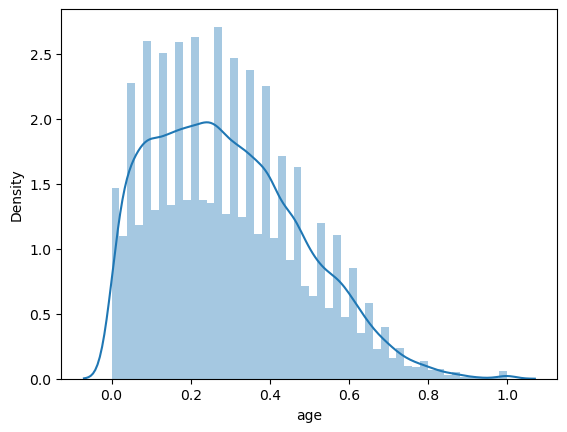

the skewness value fnlwgt 0.06456753008118435


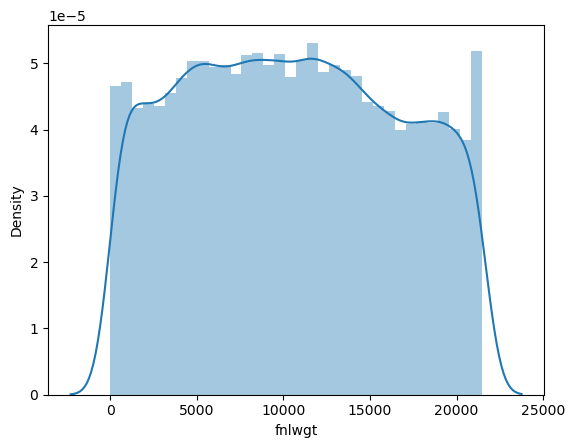

the skewness value education_num nan


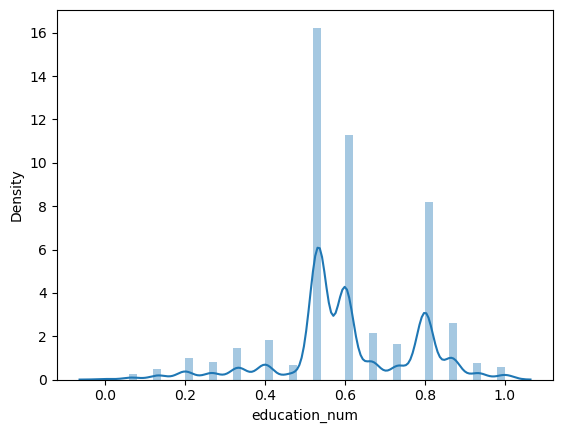

the skewness value capital_gain 3.4621815428716176


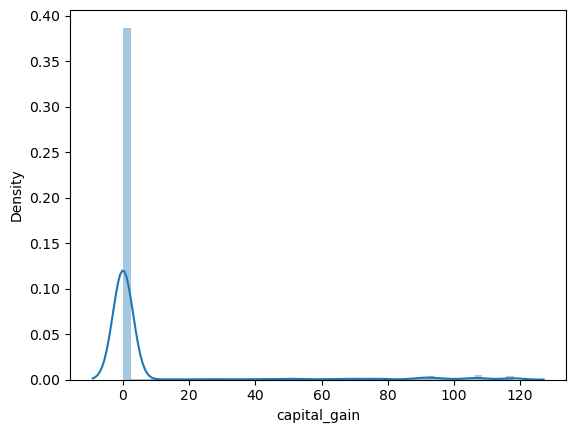

the skewness value capital_loss nan


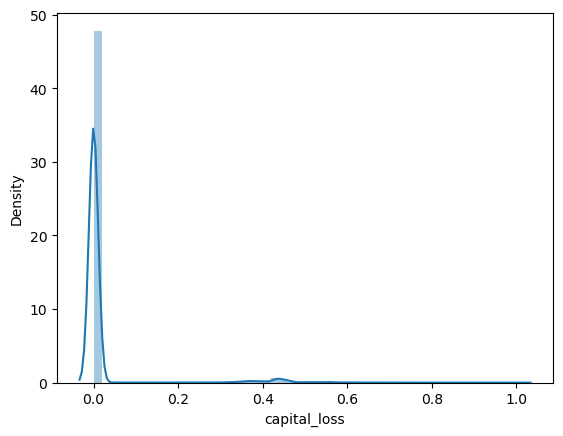

the skewness value hours_per_week 0.6359574931318335


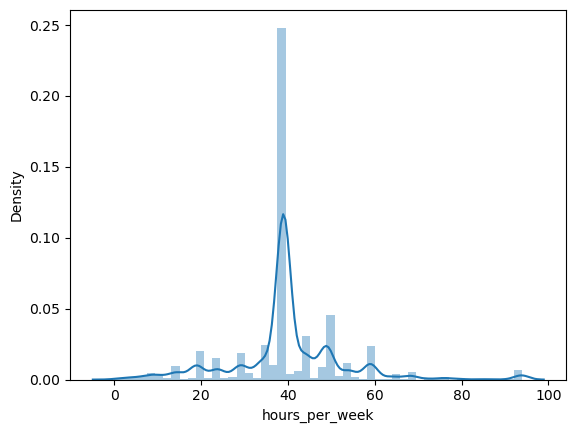

the skewness value sex_ Female 0.7194159521528372


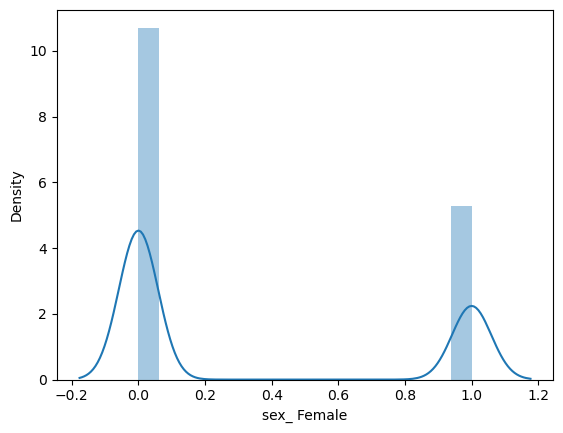

the skewness value sex_ Male -0.7194159521528369


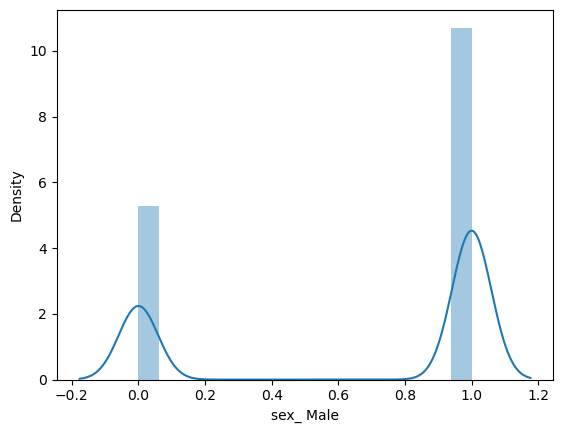

the skewness value income_ <=50K -1.211631582839416


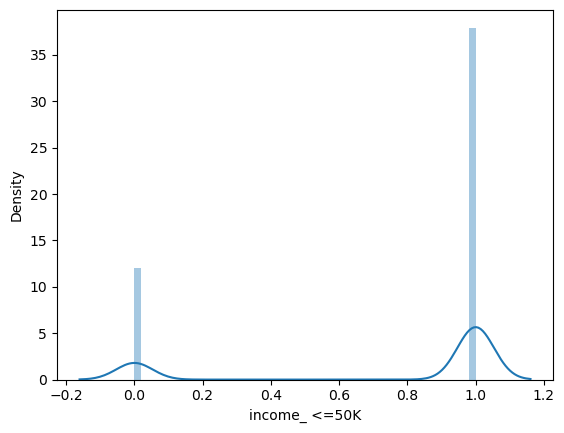

the skewness value income_ >50K 1.211631582839416


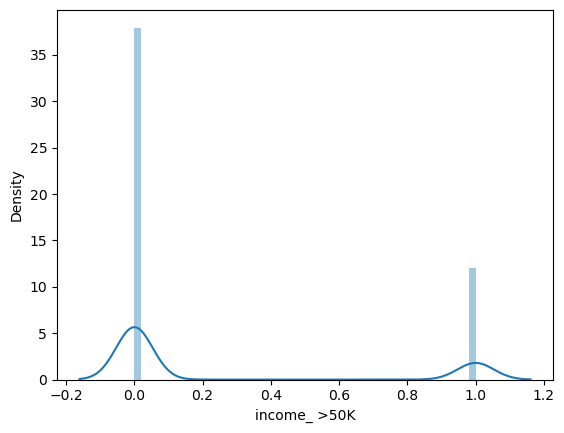

the skewness value race_ Amer-Indian-Eskimo 10.081181943146547


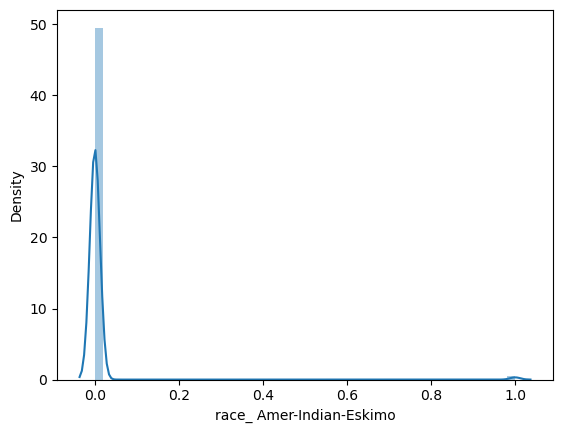

the skewness value race_ Asian-Pac-Islander 5.327176629811017


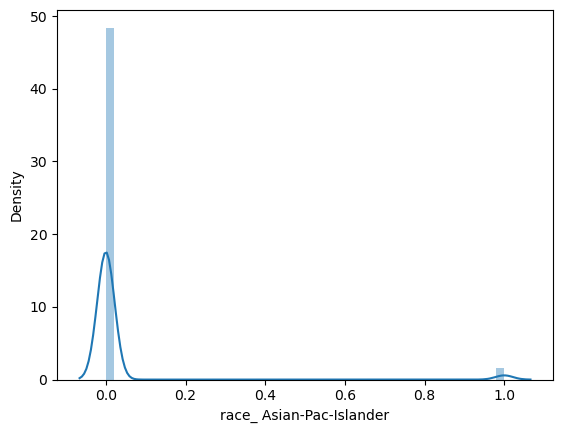

the skewness value race_ Black 2.743716693861919


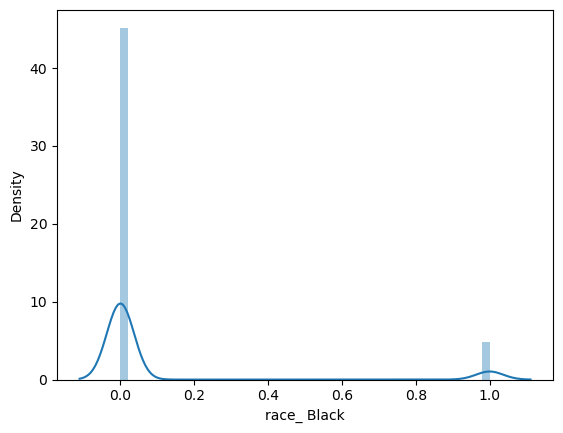

the skewness value race_ Other 10.81994129194648


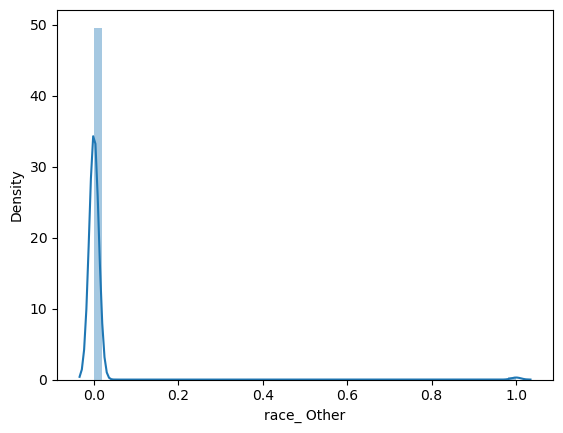

the skewness value race_ White -2.0079982790717517


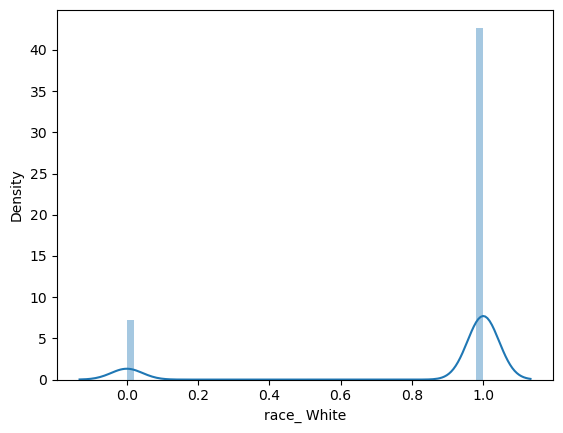

In [436]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

for i in adult_data.select_dtypes(include="number").columns:
    print("the skewness value",i,skew(adult_data[i]))

    plt.figure()
    sns.distplot(adult_data[i])
    plt.show()

In [437]:
#Capital gain is more skewness
adult_data["race_ Amer-Indian-Eskimo"]=np.log(adult_data["race_ Amer-Indian-Eskimo"])
print("the skewness value for race_Amer_Indian_Eskimo",skew(adult_data["race_ Amer-Indian-Eskimo"]))

the skewness value for race_Amer_Indian_Eskimo nan


In [444]:
#correlation matrix
print("The correlation matrix is:")
cor=adult_data.corr()
print(cor)

The correlation matrix is:
                               age    fnlwgt  education_num  capital_gain  \
age                       1.000000 -0.078594       0.030189      0.114337   
fnlwgt                   -0.078594  1.000000      -0.045000      0.080039   
education_num             0.030189 -0.045000       1.000000      0.135214   
capital_gain              0.114337  0.080039       0.135214      1.000000   
capital_loss              0.036404 -0.012715       0.068282     -0.056450   
hours_per_week            0.071297  0.055468       0.146177      0.262770   
sex_ Female              -0.087080 -0.030565      -0.008706     -0.076769   
sex_ Male                 0.087080  0.030565       0.008706      0.076769   
income_ <=50K            -0.227973 -0.013552      -0.325238     -0.341683   
income_ >50K              0.227973  0.013552       0.325238      0.341683   
race_ Amer-Indian-Eskimo       NaN       NaN            NaN           NaN   
race_ Asian-Pac-Islander -0.011381 -0.056731     

<Axes: >

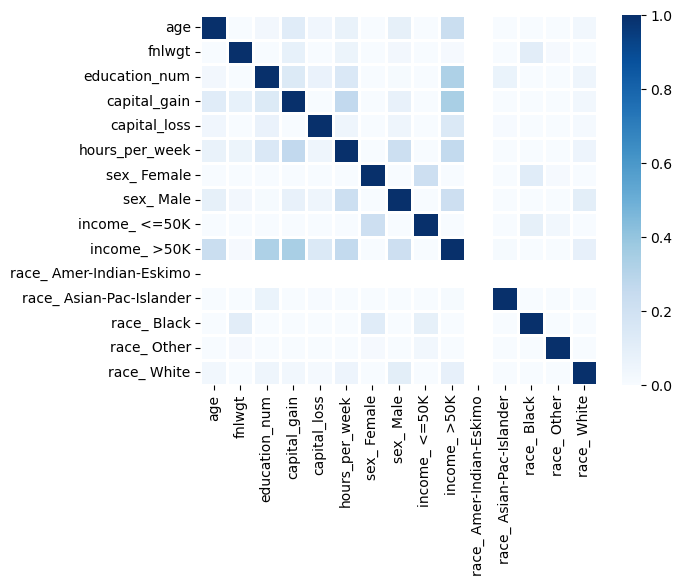

In [454]:
#heatmap
print("Heatmap for correlation")
sns.heatmap(cor,vmin=0,vmax=1,cmap="Blues",linewidths=2,annot=False)

In [477]:
import ppscore as pps

ModuleNotFoundError: No module named 'ppscore'

In [ ]:
adult_data.columns

In [ ]:
mat=pps.matrix(adult_data)

In [ ]:
#heatmap
print("Heatmap for Predictive power score")
sns.heatmap(mat,vmin=0,vmax=1,cmap="Blues",linewidths=2,annot=False)